# DSR - Practical 4 - Neural networks


### Here we are going to implement a Multi-layered Neural Network.
We will use an extreme case of stochastic gradient descent (SGD) where the batch size is 1, meaning that we update the weights of the network after showing it just one sample data point of the training set. 

In [5]:
import numpy as np
import matplotlib.pyplot as plt

### Multi-layer perceptron class:

loss function:
$$ loss = \frac{1}{N}\sum(pred-true)^{2}$$


In [30]:
class NeuralNetwork:
    def __init__(self, layers, alpha=0.1):
    # initialize the list of weights matrices, then store the
    # network architecture and learning rate
        self.W = []
        self.layers = layers
        self.alpha = alpha
        # start looping from the index of the first layer but
        # stop before we reach the last two layers
        for i in np.arange(0, len(layers) - 2):
            # randomly initialize a weight matrix connecting the
            # number of nodes in each respective layer together,
            # adding an extra node for the bias
            w = np.random.randn(layers[i] + 1, layers[i + 1] + 1)
            self.W.append(w / np.sqrt(layers[i]))
        # in this example we let the last two layers   
        # connections have no bias
        w = np.random.randn(layers[-2] + 1, layers[-1])
        self.W.append(w / np.sqrt(layers[-2]))
    
    def __repr__(self):
        # construct and return a string that represents the network
        # architecture
        return "NN architecture: {}".format(
        "-".join(str(l) for l in self.layers))
    
    def sigmoid(self, x):
        # compute and return the sigmoid activation value for a
        # given input value
        sigmoid = # ENTER YOUR CODE HERE
        return sigmoid
    def sigmoid_deriv(self, s):
        # compute the derivative of the sigmoid function ASSUMING
        # that `s` has already been passed through the `sigmoid`
        # function
        # ENTER YOUR CODE HERE
        d_sigmoid =
        return d_sigmoid
    
    def fit(self, X, y, epochs=1000, displayUpdate=100):
        # insert a column of 1's as the last entry in the feature
        # matrix -- this little trick allows us to treat the bias
        # as a trainable parameter within the weight matrix
        
        X = np.c_[X, np.ones((X.shape[0]))]
        losses = []
        # loop over the desired number of epochs
        for epoch in np.arange(0, epochs):
            # loop over each individual data point and train
            # our network on it
            for (x, target) in zip(X, y):
                self.fit_partial(x, target)
                # check to see if we should display a training update
            if epoch == 0 or (epoch + 1) % displayUpdate == 0:
                loss = self.calculate_loss(X, y)
                print("[Training: ] epoch=", epoch+1, ", loss=",loss)
                losses.append(loss)  
        return losses
                    
    def fit_partial(self, x, y):
        # construct our list of output activations for each layer
        # as our data point flows through the network; the first
        # activation is a special case -- it's just the input
        # feature vector itself
        A = [np.atleast_2d(x)]
        # FEEDFORWARD:
        # loop over the layers in the network
        for layer in np.arange(0, len(self.W)):
            # feedforward the activation at the current layer by
            # taking the dot product between the activation and
            # the weight matrix -- this is called the "net input"
            # to the current layer
            net = A[layer].dot(self.W[layer])
            # computing the "net output" is simply applying our
            # nonlinear activation function to the net input
            out = # ENTER YOUR CODE HERE
            # once we have the net output, add it to our list of
            # activations
            A.append(out)

        # BACKPROPAGATION
        # the first phase of backpropagation is to compute the
        # difference between our *prediction* (the final output
        # activation in the activations list) and the true target
        # value
        dloss = A[-1] - y

        # from here, we need to apply the chain rule and build our
        # list of deltas `D`; the first entry in the deltas is
        # simply the error of the output layer times the derivative
        # of our activation function for the output value
        D = [dloss * self.sigmoid_deriv(A[-1])]
        # once you understand the chain rule it becomes super easy
        # to implement with a `for` loop -- simply loop over the
        # layers in reverse order (ignoring the last two since we
        # already have taken them into account)
        for layer in np.arange(len(A) - 2, 0, -1):
            # the delta for the current layer is equal to the delta
            # of the *previous layer* dotted with the weight matrix
            # of the current layer, followed by multiplying the delta
            # by the derivative of the nonlinear activation function
            # for the activations of the current layer
            delta = D[-1].dot(self.W[layer].T)
            delta = delta * self.sigmoid_deriv(A[layer])
            D.append(delta)
        # since we looped over our layers in reverse order we need to
        # reverse the deltas
        D = D[::-1]
        # WEIGHT UPDATE PHASE
        # loop over the layers
        for layer in np.arange(0, len(self.W)):
        # update our weights by taking the dot product of the layer
        # activations with their respective deltas, then multiplying
        # this value by some small learning rate and adding to our
        # weight matrix -- this is where the actual "learning" takes
        # place
            self.W[layer] += -self.alpha * A[layer].T.dot(D[layer])
            
    def predict(self, X,addBias=False):
        # initialize the output prediction as the input features -- this
        # value will be (forward) propagated through the network to
        # obtain the final prediction
        p = np.atleast_2d(X)
        # insert a column of 1's as the last entry in the feature
        # matrix (bias)
        if addBias:
            p = np.c_[p, np.ones((p.shape[0]))]
        # loop over our layers in the network
        for layer in np.arange(0, len(self.W)):
            # computing the output prediction is simply
            # the forward pass
            
            p = self.sigmoid(np.dot(p, self.W[layer]))
        return p
    
    def calculate_loss(self, X, targets):
        # make predictions for the input data points then compute
        # the loss
        targets = np.atleast_2d(targets)
        predictions = self.predict(X)
        loss = (1/len(X)) * np.sum((predictions - targets) ** 2)
        return loss

SyntaxError: invalid syntax (<ipython-input-30-94a1c09eab89>, line 30)

In [21]:
# construct the XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# define our 2-2-1 neural network and train it
nn = NeuralNetwork([2, 2, 1], alpha=0.3)
print(nn.__repr__)
# fit the Neural Network
losses=nn.fit(X,y,1000)

<bound method NeuralNetwork.__repr__ of NN architecture: 2-2-1>
[Training: ] epoch= 1 , loss= 0.7369525065303044
[Training: ] epoch= 100 , loss= 0.5022180411456401
[Training: ] epoch= 200 , loss= 0.5004997308106565
[Training: ] epoch= 300 , loss= 0.4988074080928576
[Training: ] epoch= 400 , loss= 0.49644115460720184
[Training: ] epoch= 500 , loss= 0.4922910677749107
[Training: ] epoch= 600 , loss= 0.4841604486546729
[Training: ] epoch= 700 , loss= 0.4684231137961971
[Training: ] epoch= 800 , loss= 0.4421883799428232
[Training: ] epoch= 900 , loss= 0.40639047399824235
[Training: ] epoch= 1000 , loss= 0.35917764585429446


In [22]:
# now that our network is trained, loop over the XOR data points
for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    # to our console
    pred = nn.predict(x, addBias=True)
    print(pred)
    step = 1 if pred > 0.5 else 0
    print("data=",x,", ground-truth=",target,", pred=,",pred," step=",step)

[[0.41437942]]
data= [0 0] , ground-truth= [0] , pred=, [[0.41437942]]  step= 0
[[0.74676425]]
data= [0 1] , ground-truth= [1] , pred=, [[0.74676425]]  step= 1
[[0.41003617]]
data= [1 0] , ground-truth= [1] , pred=, [[0.41003617]]  step= 0
[[0.36668695]]
data= [1 1] , ground-truth= [0] , pred=, [[0.36668695]]  step= 0


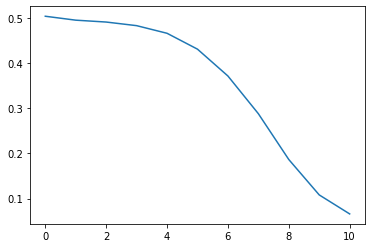

In [5]:
# plot the losses as function of training
plt.plot(losses)

 ### Repeat the training with a NN with [2,1] architechture

In [23]:
### ENTER YOUR CODE HERE
nn = 
print(nn.__repr__)
# fit the Neural Network using 100 epochs
### ENTER YOUR CODE HERE
losses=

<bound method NeuralNetwork.__repr__ of NN architecture: 2-1>
[Training: ] epoch= 1 , loss= 0.5170318433970126
[Training: ] epoch= 100 , loss= 0.5002389263753596
[Training: ] epoch= 200 , loss= 0.5001532601783355
[Training: ] epoch= 300 , loss= 0.500227192672055
[Training: ] epoch= 400 , loss= 0.5002601188027591
[Training: ] epoch= 500 , loss= 0.5002714888244832
[Training: ] epoch= 600 , loss= 0.5002751879277106
[Training: ] epoch= 700 , loss= 0.5002763709059848
[Training: ] epoch= 800 , loss= 0.5002767472715666
[Training: ] epoch= 900 , loss= 0.5002768668261943
[Training: ] epoch= 1000 , loss= 0.500276904786037


In [24]:
# now that our network is trained, loop over the XOR data points
for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    # to our console
    pred = nn.predict(x,addBias=True)
    step = 1 if pred > 0.5 else 0
    print("data=",x,", ground-truth=",target,", pred=,",pred," step=",step)

data= [0 0] , ground-truth= [0] , pred=, [[0.50954855]]  step= 1
data= [0 1] , ground-truth= [1] , pred=, [[0.49999985]]  step= 0
data= [1 0] , ground-truth= [1] , pred=, [[0.49045044]]  step= 0
data= [1 1] , ground-truth= [0] , pred=, [[0.48090871]]  step= 0


Notice that this network consisting of 1 neuron with two inputs is not enough for the XOR problem

### Classification Problem

In [31]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets

In [32]:
# load the MNIST dataset and apply min/max scaling to scale the
# pixel intensity values to the range [0, 1] (each image is
# represented by an 8 x 8 = 64-dim feature vector)
print("loading MNIST (sample) dataset...")
digits = datasets.load_digits()
data = digits.data.astype("float")
data = (data - data.min()) / (data.max() - data.min())
print("samples: {}, dim: {}".format(data.shape[0],
data.shape[1]))
# construct the training and testing splits
(trainX, testX, trainY, testY) = train_test_split(data,
digits.target, test_size=0.25)
# convert the labels from integers to vectors: 1 = [0,1,0,0,0,0,0,0,0,0]
lb=LabelBinarizer()
trainY = LabelBinarizer().fit_transform(trainY)
testY = lb.fit_transform(testY)

loading MNIST (sample) dataset...
samples: 1797, dim: 64


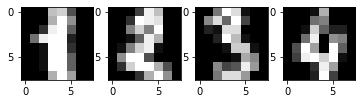

In [33]:
for i in range(1,5):
    plt.subplot(1,4,i)
    plt.imshow(np.array(data[i]).reshape(8,8),cmap='gray')

In [29]:
# train the network
print("training network...")
#create a network object with two hidden layer h1 = 32 units and h2 = 16 units
# ENTER YOUR CODE HERE
nn =  
print("{}".format(nn))
# fit your network using 1500 epochs
# ENTER YOUR CODE HERE
losses2 = 
# evaluate the network
print("evaluating network...")
# test your network on the test data set (remember to set addBias to True)
# ENTER YOUR CODE HERE
predictions = 
# there is a value outputed on each of the output nodes. we choose the one with the highest
# value to represent the predicted label
predictions = predictions.argmax(axis=1)
print(classification_report(testY.argmax(axis=1), predictions))

training network...
NN architecture: 64-32-16-10
[Training: ] epoch= 1 , loss= 581.1626949757624
[Training: ] epoch= 100 , loss= 1.23314533279164
[Training: ] epoch= 200 , loss= 1.0974620179050332
[Training: ] epoch= 300 , loss= 1.0610858658103783
[Training: ] epoch= 400 , loss= 1.0441804991575163
[Training: ] epoch= 500 , loss= 1.0344577430807966
[Training: ] epoch= 600 , loss= 1.0281635101179507
[Training: ] epoch= 700 , loss= 1.0237668088556662
[Training: ] epoch= 800 , loss= 1.0205277396336072
[Training: ] epoch= 900 , loss= 1.0180456499041424
[Training: ] epoch= 1000 , loss= 1.0160850150086156
[Training: ] epoch= 1100 , loss= 1.0144984740126124
[Training: ] epoch= 1200 , loss= 1.0131891926341798
[Training: ] epoch= 1300 , loss= 1.0120909655651567
[Training: ] epoch= 1400 , loss= 1.0111570222056332
[Training: ] epoch= 1500 , loss= 1.0103534002592078
evaluating network...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
   

In [12]:
# we now transform the labels of the test set back to integers from vectors for plotting purposes
testY=lb.inverse_transform(testY)

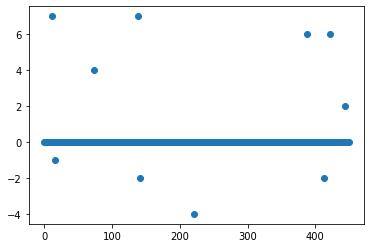

In [13]:

plt.scatter(np.arange(len(predictions)),testY-predictions)

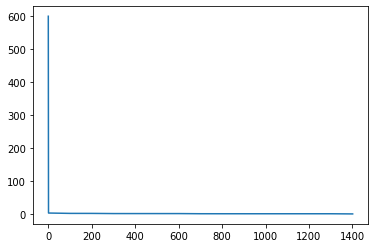

In [14]:
# plot losses vs epochs
plt.plot(np.concatenate(([0], np.arange(1,1500,100))),losses2)

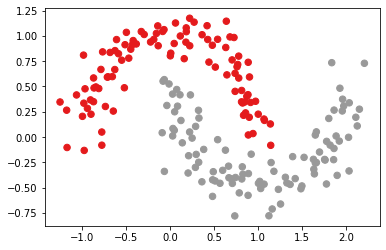

In [15]:
import sklearn.datasets
#  load a classification dataset from sklearn
X, Y = sklearn.datasets.make_moons(200, noise=0.150)
plt.scatter(X[:,0], X[:,1], s=42, c=Y, cmap=plt.cm.Set1)
y=Y.reshape(-1,1)

In [16]:
y=np.concatenate((y,np.logical_not(y).astype('int')),axis=1)
y.shape

(200, 2)

In [17]:
# train a network of shape with a single hidden layer of 3 units
# (not input layer and not output layer) 
# and learning rate of 0.01
# ENTER YOUR CODE HERE
nn = 
# fit model using 10000 epochs
# ENTER YOUR CODE HERE
losses3 = 

[Training: ] epoch= 1 , loss= 49.08199645417883
[Training: ] epoch= 100 , loss= 20.65119341746522
[Training: ] epoch= 200 , loss= 18.934998049489252
[Training: ] epoch= 300 , loss= 18.658438460403907
[Training: ] epoch= 400 , loss= 18.57865775110286
[Training: ] epoch= 500 , loss= 18.538731366164313
[Training: ] epoch= 600 , loss= 18.509511714186644
[Training: ] epoch= 700 , loss= 18.48423541149321
[Training: ] epoch= 800 , loss= 18.461044092018135
[Training: ] epoch= 900 , loss= 18.439314256247826
[Training: ] epoch= 1000 , loss= 18.418775769035392
[Training: ] epoch= 1100 , loss= 18.39927489367297
[Training: ] epoch= 1200 , loss= 18.380699717695173
[Training: ] epoch= 1300 , loss= 18.362952215992202
[Training: ] epoch= 1400 , loss= 18.345937537578145
[Training: ] epoch= 1500 , loss= 18.32956135455869
[Training: ] epoch= 1600 , loss= 18.313731054075017
[Training: ] epoch= 1700 , loss= 18.29835833572281
[Training: ] epoch= 1800 , loss= 18.28336187047956
[Training: ] epoch= 1900 , loss=

In [ ]:
# Set min and max values and give it some padding
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole gid
Z = nn.predict(np.c_[xx.ravel(), yy.ravel()],addBias=True)

# Plot the contour and training examples
plt.contourf(xx, yy, Z[:,1].reshape(xx.shape), cmap=plt.cm.Set1, alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Set1)

### 1. Change the learnig rate (10 times bigger), did the loss decrease faster?
### 2. Try different NN architecutres and see how performance changes

### Regression Problem

In [19]:
X = np.random.uniform(-1, 1, size=1000)

y= np.power(X,2)+ np.random.normal(0, 1, size=X.shape[0]) * 0.2
X = X.reshape(-1,1)
y = y.reshape(-1,1)

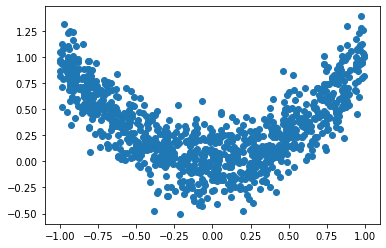

In [20]:
plt.scatter(X,y)

In [21]:
nn = NeuralNetwork([1, 6,1], alpha=0.01)
losses4 = nn.fit(X, y, epochs=10000)

[Training: ] epoch= 1 , loss= 63.58412438303212
[Training: ] epoch= 100 , loss= 34.4869038818933
[Training: ] epoch= 200 , loss= 21.080523871361933
[Training: ] epoch= 300 , loss= 19.955945394069417
[Training: ] epoch= 400 , loss= 19.75790345142498
[Training: ] epoch= 500 , loss= 19.696838190958204
[Training: ] epoch= 600 , loss= 19.666489357743345
[Training: ] epoch= 700 , loss= 19.64636331951319
[Training: ] epoch= 800 , loss= 19.631195446241634
[Training: ] epoch= 900 , loss= 19.619044319900368
[Training: ] epoch= 1000 , loss= 19.608922979572085
[Training: ] epoch= 1100 , loss= 19.600235159237712
[Training: ] epoch= 1200 , loss= 19.592590821745855
[Training: ] epoch= 1300 , loss= 19.585722370459077
[Training: ] epoch= 1400 , loss= 19.579438995296353
[Training: ] epoch= 1500 , loss= 19.573599730171864
[Training: ] epoch= 1600 , loss= 19.568096840391085
[Training: ] epoch= 1700 , loss= 19.562845278062518
[Training: ] epoch= 1800 , loss= 19.557775899129474
[Training: ] epoch= 1900 , lo

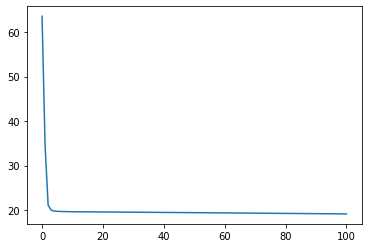

In [22]:
plt.plot(losses4)

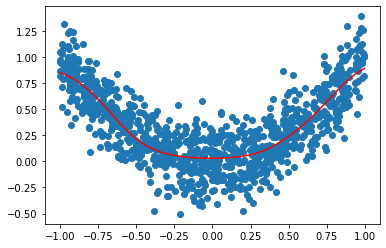

In [23]:
plt.scatter(X,y)
y_hat =  nn.predict(np.sort(X,axis=0),addBias=True)
plt.plot(np.sort(X,axis=0),y_hat,c='red')

In [24]:
X.shape

(1000, 1)

### Try different NN architecutres and see how performance changes 
### Try different learning rates and see if you can improve the results

### Change the `NeuralNetwork` class such that you use the momentum rule for updating the weights. Retrain the MNIST dataset. 

* How did the training go? 
* Are the losses smaller? 
* Is the accuracy the same? 
* What does it mean?

In [2]:
# YOUR CODE HERE

In [5]:
# load the MNIST dataset and apply min/max scaling to scale the
# pixel intensity values to the range [0, 1] (each image is
# represented by an 8 x 8 = 64-dim feature vector)
print("loading MNIST (sample) dataset...")
digits = datasets.load_digits()
data = digits.data.astype("float")
data = (data - data.min()) / (data.max() - data.min())
print("samples: {}, dim: {}".format(data.shape[0],
data.shape[1]))
# construct the training and testing splits
(trainX, testX, trainY, testY) = train_test_split(data,
digits.target, test_size=0.25)
# convert the labels from integers to vectors:1 = [0,1,0,0,0,0,0,0,0,0]
lb=LabelBinarizer()
trainY =lb.fit_transform(trainY)
testY = lb.transform(testY)

loading MNIST (sample) dataset...
samples: 1797, dim: 64


In [6]:
# train the network
print("training network...")
#create a network object with two hidden layer h1 = 32 units and h2 = 16 units
# use alpha=0.5 and gamma=0.5
# ENTER YOUR CODE HERE
nn = 
print("{}".format(nn))
# fit your network 1500 ephocs
# ENTER YOUR CODE HERE
losses5 = 
# evaluate the network
print("evaluating network...")
# make prediction on test set
# ENTER YOUR CODE HERE
predictions2 = 
predictions2 = predictions2.argmax(axis=1)
print(classification_report(testY.argmax(axis=1), predictions2))

training network...
NN architecture: 64-32-16-10
[Training: ] epoch= 1 , loss= 462.2215087238684
[testing:] test loss 157.52412120679014
[Training: ] epoch= 100 , loss= 0.6154578328486505
[testing:] test loss 12.352750215718785
[Training: ] epoch= 200 , loss= 0.05432720992075998
[testing:] test loss 11.851659839896683
[Training: ] epoch= 300 , loss= 0.032239712876858034
[testing:] test loss 11.563767587857338
[Training: ] epoch= 400 , loss= 0.022998325411491563
[testing:] test loss 11.428692133894137
[Training: ] epoch= 500 , loss= 0.017825347800691844
[testing:] test loss 11.349412120024024
[Training: ] epoch= 600 , loss= 0.014514358608239665
[testing:] test loss 11.293113558294651
[Training: ] epoch= 700 , loss= 0.012222950725596564
[testing:] test loss 11.246703333418477
[Training: ] epoch= 800 , loss= 0.010549573071534873
[testing:] test loss 11.20550189934811
[Training: ] epoch= 900 , loss= 0.009276482915227029
[testing:] test loss 11.168023317736669
[Training: ] epoch= 1000 , los

In [34]:
#plot losses with and without momentum

In [ ]:
# try different gamma values